# 0. Load Data

In [11]:
import numpy as np
import os
import gzip

In [19]:
os.getcwd()

'/Users/ag80509'

In [24]:
os.chdir('Statistical-Learning')

### Experiments

In [34]:
with gzip.open('data/zipcode/zip.train.gz', 'r') as f:
    train_data = f.read()

In [37]:
type(train_data)

bytes

In [66]:
train_data = train_data.decode()
train_data_split = train_data.split('\n')

In [100]:
len(train_data_split)

7292

In [103]:
len(train_data_split[:-1])

7291

In [67]:
train_data_split[0]

'6.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.6310 0.8620 -0.1670 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.9920 0.2970 1.0000 0.3070 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.4100 1.0000 0.9860 -0.5650 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.6830 0.8250 1.0000 0.5620 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.9380 0.5400 1.0000 0.7780 -0.7150 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 0.1000 1.0000 0.9220 -0.4390 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.2570 0.9500 1.0000 -0.1620 -1.0000 -1.0000 -1.0000 -0.9870 -0.7140 -0.8320 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.7970 0.9090 1.0000 0.3000 -0.9610 -1.0000 -1.0000 -0.5500 0.4850 0.9960 0.8670 0.0920 -1.0000 

In [86]:
train_data_line = train_data_split[0].split(' ')

In [87]:
len(train_data_line)

258

In [97]:
label0 = int(float(train_data_line[0]))
label0

6

In [89]:
image0 = train_data_line[1:-1]

In [91]:
image0 = [float(x) for x in image0]

In [92]:
image0 = np.array(image0).reshape(16,16)

In [93]:
import matplotlib.pyplot as plt

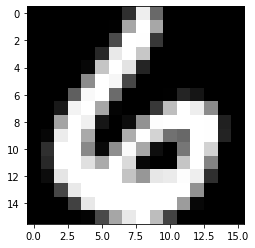

In [94]:
fig = plt.figure
plt.imshow(image0, cmap='gray')

### Functions for data loading

In [99]:
with gzip.open('data/zipcode/zip.train.gz', 'r') as f:
    train_data = f.read()
with gzip.open('data/zipcode/zip.test.gz', 'r') as f:
    test_data = f.read()

In [134]:
def prepare_train_data(data: bytes):
    """
    Convert bytes data to data label and np array.
    """
    data = data.decode()
    data_split = data.split('\n')[:-1]
    labels = np.zeros(len(data_split))
    images = np.zeros([len(data_split), 16, 16])
    for i in range(len(data_split)):
        line = data_split[i].split(' ')[:-1]
        label = line[0]
        labels[i] = int(float(label))
        image = line[1:]
        image = [float(x) for x in image]
        images[i] = np.array(image).reshape(16,16)
    return labels, images
        

### Train Data

In [169]:
train_labels, train_images = prepare_train_data(train_data)

In [126]:
print('train_data:', len(train_labels))

train_data: 7291


Selected 5 labels: [6. 9. 0. 7. 0.]
Selected 5 images:


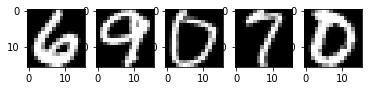

In [127]:
select = [0, 1000, 2000, 3000, 4000]
print('Selected 5 labels:', train_labels[select])
print('Selected 5 images:')
fig = plt.figure(0)
ax1 = fig.add_subplot(1,5,1)
ax1.imshow(train_images[0], cmap='gray')
ax2 = fig.add_subplot(1,5,2)
ax2.imshow(train_images[1000], cmap='gray')
ax3 = fig.add_subplot(1,5,3)
ax3.imshow(train_images[2000], cmap='gray')
ax4 = fig.add_subplot(1,5,4)
ax4.imshow(train_images[3000], cmap='gray')
ax5 = fig.add_subplot(1,5,5)
ax5.imshow(train_images[4000], cmap='gray')

### Test Data

In [139]:
len(test_data.decode().split('\n'))

2008

In [138]:
test_data.decode().split('\n')[-1]

''

In [135]:
print(test_data.decode().split('\n')[0].split(' '))

['9', '-1', '-1', '-1', '-1', '-1', '-0.948', '-0.561', '0.148', '0.384', '0.904', '0.29', '-0.782', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-0.748', '0.588', '1', '1', '0.991', '0.915', '1', '0.931', '-0.476', '-1', '-1', '-1', '-1', '-1', '-1', '-0.787', '0.794', '1', '0.727', '-0.178', '-0.693', '-0.786', '-0.624', '0.834', '0.756', '-0.822', '-1', '-1', '-1', '-1', '-0.922', '0.81', '1', '0.01', '-0.928', '-1', '-1', '-1', '-1', '-0.39', '1', '0.271', '-1', '-1', '-1', '-1', '0.012', '1', '0.248', '-1', '-1', '-1', '-1', '-1', '-0.402', '0.326', '1', '0.801', '-0.998', '-1', '-1', '-0.981', '0.645', '1', '-0.687', '-1', '-1', '-1', '-1', '-0.792', '0.976', '1', '1', '0.413', '-0.976', '-1', '-1', '-0.993', '0.834', '0.897', '-0.951', '-1', '-1', '-1', '-0.831', '0.14', '1', '1', '0.302', '-0.889', '-1', '-1', '-1', '-1', '0.356', '0.794', '-0.836', '-1', '-0.445', '0.074', '0.833', '1', '1', '0.696', '-0.881', '-1', '-1', '-1', '-1', '-1', '-0.368', '0.955', '1', '1', '1',

In [140]:
def prepare_test_data(data: bytes):
    """
    Convert bytes data to data label and np array.
    """
    data = data.decode()
    data_split = data.split('\n')[:-1]
    labels = np.zeros(len(data_split))
    images = np.zeros([len(data_split), 16, 16])
    for i in range(len(data_split)):
        line = data_split[i].split(' ')
        label = line[0]
        labels[i] = int(float(label))
        image = line[1:]
        image = [float(x) for x in image]
        images[i] = np.array(image).reshape(16,16)
    return labels, images
        

In [141]:
test_labels, test_images = prepare_test_data(test_data)

In [142]:
print('test_data:', len(test_labels))

test_data: 2007


Selected 5 labels: [9. 0. 3. 9. 1.]
Selected 5 images:


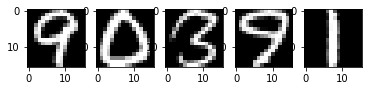

In [143]:
select = [0, 100, 200, 300, 400]
print('Selected 5 labels:', test_labels[select])
print('Selected 5 images:')
fig = plt.figure(1)
ax1 = fig.add_subplot(1,5,1)
ax1.imshow(test_images[0], cmap='gray')
ax2 = fig.add_subplot(1,5,2)
ax2.imshow(test_images[100], cmap='gray')
ax3 = fig.add_subplot(1,5,3)
ax3.imshow(test_images[200], cmap='gray')
ax4 = fig.add_subplot(1,5,4)
ax4.imshow(test_images[300], cmap='gray')
ax5 = fig.add_subplot(1,5,5)
ax5.imshow(test_images[400], cmap='gray')

### For this exercise we are only taking label 2 & 3.

And we are only using LR and KNN, so we reshape x from (16,16) to a 256-d vector, padding with 1 in the beginning as x0.

In [200]:
train_index = np.where((train_labels==2)|(train_labels==3))[0]

In [234]:
train_y = train_labels[train_index]
train_x = train_images[train_index]
train_x_reshape = train_x.reshape(len(train_x), 256)
mat_x = np.hstack((np.ones((len(train_x_reshape), 1)), train_x_reshape))

In [235]:
mat_x.shape

(1389, 257)

In [237]:
train_y.shape

(1389,)

In [203]:
test_index = np.where((test_labels==2)|(test_labels==3))[0]

In [238]:
test_y = test_labels[test_index]
test_x = test_images[test_index]
test_x_reshape = test_x.reshape(len(test_x), 256)
test_mat_x = np.hstack((np.ones((len(test_x_reshape), 1)), test_x_reshape))

In [239]:
test_mat_x.shape

(364, 257)

In [240]:
test_y.shape

(364,)

# 1. Linear Regression

### Train

In [281]:
# Linear regression
mat_xt = np.transpose(mat_x)

# Solve (X^T*X)b = X^T*y for b
ols_beta = np.linalg.solve(np.matmul(mat_xt, mat_x), np.matmul(mat_xt, train_y))


In [282]:
ols_beta.shape

(257,)

In [283]:
train_results = np.zeros(len(train_y))
for i in range(len(train_y)):
    result = np.matmul(np.transpose(mat_x[i]), ols_beta)
    if result > 2.5:
        train_results[i] = 3.0
    else:
        train_results[i] = 2.0

In [284]:
lr_train_error_rate = sum(abs(train_results - train_y))/len(train_y)
print('train error rate:', train_error_rate)

train error rate: 0.0


### Test

In [285]:
test_results = np.zeros(len(test_y))
for i in range(len(test_y)):
    result = np.matmul(np.transpose(test_mat_x[i]), ols_beta)
    if result > 2.5:
        test_results[i] = 3.0
    else:
        test_results[i] = 2.0

In [286]:
lr_test_error_rate = sum(abs(test_results - test_y))/len(test_y)
print('test error rate:', test_error_rate)

test error rate: 0.024725274725274724


# 2. KNN

Don't need 1 padding. So we use train_x_reshape.

In [266]:
def knn(k, sample, data_x, data_y):
    distances = [(sum((x - sample)**2), x, y) for x, y in zip(data_x, data_y)]
    distances = sorted(distances, key=lambda x: x[0])
    knn = sum([item[2] for item in (distances[:k])])/k
    return knn

## K = 1

In [267]:
k = 1

In [268]:
knn(k, train_x_reshape[0], train_x_reshape, train_y)

3.0

### Train

In [272]:
train_results = np.zeros(len(train_y))
for i in range(len(train_y)):
    result = knn(k, train_x_reshape[i], train_x_reshape, train_y)
    if result > 2.5:
        train_results[i] = 3.0
    else:
        train_results[i] = 2.0

In [273]:
train_error_rate = sum(abs(train_results - train_y))/len(train_y)
print('train error rate:', train_error_rate)

train error rate: 0.0


### Test

In [274]:
test_results = np.zeros(len(test_y))
for i in range(len(test_y)):
    result = knn(k, test_x_reshape[i], train_x_reshape, train_y)
    if result > 2.5:
        test_results[i] = 3.0
    else:
        test_results[i] = 2.0

In [275]:
test_error_rate = sum(abs(test_results - test_y))/len(test_y)
print('test error rate:', test_error_rate)

test error rate: 0.024725274725274724


## K = 1,3,5,7,15

In [277]:
k_list = [1,3,5,7,15]

In [280]:
train_error_rates = np.zeros(5)
test_error_rates = np.zeros(5)
for j in range(5):
    k = k_list[j]
    # Train
    train_results = np.zeros(len(train_y))
    for i in range(len(train_y)):
        result = knn(k, train_x_reshape[i], train_x_reshape, train_y)
        if result > 2.5:
            train_results[i] = 3.0
        else:
            train_results[i] = 2.0
    train_error_rates[j] = sum(abs(train_results - train_y))/len(train_y)
    # Test
    test_results = np.zeros(len(test_y))
    for i in range(len(test_y)):
        result = knn(k, test_x_reshape[i], train_x_reshape, train_y)
        if result > 2.5:
            test_results[i] = 3.0
        else:
            test_results[i] = 2.0
    test_error_rates[j] = sum(abs(test_results - test_y))/len(test_y)

### Plot

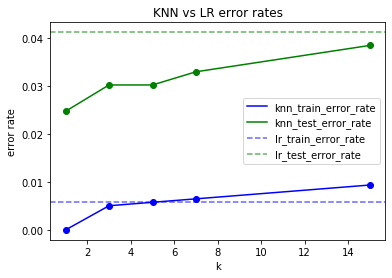

In [310]:
fig2 = plt.figure()
plt.plot(k_list, train_error_rates, '-', color = 'blue', label = 'knn_train_error_rate')
plt.plot(k_list, train_error_rates, 'o', color = 'blue')
plt.plot(k_list, test_error_rates, '-', color = 'green', label = 'knn_test_error_rate')
plt.plot(k_list, test_error_rates, 'o', color = 'green')
plt.axhline(y=lr_train_error_rate, linestyle='--', color='blue', alpha = 0.6, label = 'lr_train_error_rate')
plt.axhline(y=lr_test_error_rate, linestyle='--', color='green', alpha = 0.6, label = 'lr_test_error_rate')
plt.legend()
plt.title('KNN vs LR error rates')
plt.xlabel('k')
plt.ylabel('error rate')
plt.show()